In [1]:
import streamlit as st
from utils import GoogleFontsClassifier
from PIL import Image, ImageOps
import torch
import numpy as np
from dataloader import Datagenerator
from train import Config
import random

In [2]:
image = Image.open("/home/benjaminb/Dokumente/tmp/18/a.png")

In [4]:

# scale the image to a the height of 150px while keeping the aspect ratio
image = image.resize((int( image.width * 150 / image.height), 150))

image_np = np.array(image)

# we check if the background is white or black and invert the image if it is white
hist, bin_edges = np.histogram(image_np, bins=10)
most_frequent_bins = np.argsort(hist)[::-1]
if most_frequent_bins[0] < most_frequent_bins[1]:
    image_np = 255 - image_np

# normalize the image between 0 and 255
image_np_norm = (image_np-np.min(image_np))/(np.max(image_np)-np.min(image_np)) * 255

# fit the image to a 150x700px
padded_tensor = np.ones((150, 700))
h = min(image_np_norm.shape[1], 700)
padded_tensor[:, :h] = image_np_norm[:, :h]
image = padded_tensor
image = torch.from_numpy(image).unsqueeze(0)



OSError: not supported for mode <built-in method mode of Tensor object at 0x7f2568611b50>

## Export to ONNX

In [3]:
from utils import GoogleFontsClassifier
import torch.onnx

model = GoogleFontsClassifier(1738)
model.load_state_dict(torch.load("model/model_resnet_final_v1.pth", map_location=torch.device("cpu")))
model.eval()


dummy_input = torch.randn(1, 150, 700)
torch.onnx.export(
    model,
    dummy_input,
    "model/model_resnet_final_v1.onnx",
    input_names=["input"],
    output_names=["output"],
    dynamic_axes={"input": {0: "batch_size"}, "output": {0: "batch_size"}},
    opset_version=11
)

/tmp/ipykernel_5414/1127699195.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("model/model_resnet_final_v1.pth", map_location=torch.dev

In [2]:
model(dummy_input)

tensor([[-255.3152, -373.6483, -310.0295,  ..., -161.7012, -100.8450,
         -105.0676]], grad_fn=<AddmmBackward0>)

## Export the classification dict

In [14]:
from dataloader import Datagenerator
from train import Config
import json
import os


data = Datagenerator(Config())

data.fonts_unique

with open("website/fonts.json", "w") as f:
    json.dump(data.fonts_unique, f)

In [18]:
fonts_to_subfonts = {k: [ os.path.basename(v_) for v_ in v] for k, v in data.font_to_subfonts.items()}
with open("website/fonts_to_subfonts.json", "w") as f:
    json.dump(fonts_to_subfonts, f)

## Image Generator

tensor(726)


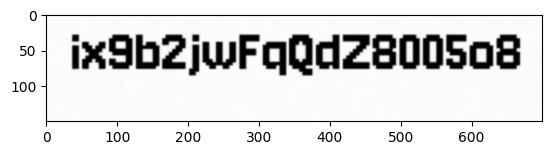

In [13]:
from dataloader import Datagenerator
from train import Config
from matplotlib import pyplot as plt

data = Datagenerator(Config())
d = data[3]
plt.imshow(d[0], cmap="gray")
print(d[1])